# Trabajo Práctico 1 : Reservas de Hotel

<hr width="50%" align="left"/>

<br/>

## **Checkpoint 1 - "Análisis Exploratorio y Preprocesamiento de Datos"**

<br/>

## **Grupo:** 03 - **_"Hackers Panas"_**

<br/>

## **Integrantes:**

<p>
<img align="left" src="https://github.com/NLGS2907.png" height=50 width=50 />

### [Franco Lighterman Reismann](https://github.com/NLGS2907) (106714)
<br/>
</p>

<p>
<img align="left" src="https://github.com/MarcosGN.png" height=50 width=50 />

### [Marcos García Neira](https://github.com/MarcosGN) (110363)
<br/>
</p>

<p>
<img align="left" src="https://github.com/mmaddalena.png" height=50 width=50 />

### [Martín Andrés Madalena](https://github.com/mmaddalena) (107610)
</p>

<br/><br/><br/><br/>
<hr/>

# **_imports_ de librerías:**

Acá importamos todas las librerías para mantener los `import` juntos en un lugar.

In [54]:
# Procesamiento de datos
import numpy as np
import pandas as pd

# Herramientas para graficar
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import scipy.stats as st

# imports exclusivamente hechos para lidiar con type checking
from typing import Optional, TYPE_CHECKING, Union
if TYPE_CHECKING:
    from matplotlib.axes._axes import Axes

# Otros
from IPython.display import display # a veces va a ser preferible a print()
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)

In [55]:
# Algunas opciones globales para los gráficos
sns.set_style("whitegrid")

<hr width="50%" align="left"/>

Primero importemos el dataset en cuestión.

In [56]:
# nos apoyamos en nuestra copia del dataset, subido al repositorio
# original = pd.read_csv("./Datasets/hotels_train.csv")
original = pd.read_csv("https://raw.githubusercontent.com/NLGS2907/7506R-2C2023-GRUPO03/master/TPs/TP1/Datasets/hotels_train.csv")
df_trabajo = original.copy()
display(df_trabajo.head())

filas, columnas = df_trabajo.shape
print(f"El DataFrame, en su totalidad, tiene {filas} filas y {columnas} columnas.")

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0


El DataFrame, en su totalidad, tiene 61913 filas y 31 columnas.


# **Exploración Inicial:**

Se ven las siguientes variables:

In [57]:
print(f"\nCantidad de columnas/variables: {len(df_trabajo.columns)}")
df_trabajo.columns


Cantidad de columnas/variables: 31


Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'id',
       'is_canceled'],
      dtype='object')

| Tipo de Variable |  Símbolo  |
|:----------------:|:---------:|
|Categórica/Cualitativa|   ★  |
|Cuasicuantitativa/Ordinal|♦   |
|Cuantitativa Discreta|    ♣   |
|Cuantitativa Continua|    ♠   |

<br/><hr width="25%" align="left" /><br/>

* **★ hotel:** El tipo de hotel al que la reserva se le atribuye. Las reservas ocurren en dos hoteles:
`"Resort Hotel"` y `"City Hotel"`.

* **♣ lead_time:** Los días que pasan desde que se hace la reserva hasta que el cliente efectivamente llega al hotel.

* **♣ arrival_date_year:** El año de llegada, en su representación decimal.

* **★ arrival_date_month:** El nombre de mes de llegada.

* **♣ arrival_date_week_number:** El número de semana de llegada.

* **♣ arrival_date_day_of_month:** Número del día del mes en que ocurrió la llegada.

* **♣ stays_in_weekend_nights:** Número de noches reservadas/estadías en fines de semana (Sábado-Domingo).

* **♣ stays_in_week_nights:** Número de noches reservadas/estadías en días de semana (Lunes a Viernes).

* **♣ adults:** Cantidad de adultos en la reserva.

* **♣ children:** Cantidad de niños en la reserva.

* **♣ babies:** Cantidad de bebés en la reserva.

* **★ meal:** El tipo de comidas pagado en la reserva. Se esperan los siguientes tipos:
    * `Undefined` o `SC`: Sin comida.
    * `BB` _(Bed and Breakfast)_: Sólo desayuno.
    * `HB` _(Half Board)_: Desayuno y otra comida (típicamente la cena).
    * `FB` _(Full Board)_: Desayuno, almuerzo y cena.

<br/>

* **★ country:** País de origen.

* **★ market_segment:** El segmento de mercado.
    * La abreviación `TA` _(travel agents)_ refiere a agencias de viaje; mientras que `TO` _(tour operators)_, a agencias de turismo.

<br/>

* **★ distribution_channel:** Cómo la reserva fue "distribuida" al cliente.

* **★ is_repeated_guest:** Si la reserva es de un cliente previo (`1`) o no (`0`).

* **♣ previous_cancellations:** Cantidad de veces que una reserva previa fue cancelada por el cliente.

* **♣ previous_bookings_not_canceled:** Número de veces que una reserva previa ***no*** fue cancelada por el cliente.

* **★ reserved_room_type:** El tipo de habitación reservada por el cliente.

* **★ assigned_room_type:** El tipo de habitación efectivamente asignada a la reserva.

* **♣ booking_changes:** Cambios hechos a la reserva desde el momento en que fue hecha.

* **★ deposit_type:** Tipo de depósito, para indicar si el cliente garantiza la reserva. Se esperan los tipos:
    * `No Deposit`: No se hizo un depósito.
    * `Non Refund`: Se hizo un depósito igual o mayor al precio de estadía.
    * `Refundable`: Se hizo un depósito menor al precio de estadía.

<br/>

* **★ agent:** El ID de la agencia que hizo la reserva.

* **★ company:** El ID de la compañía que hizo la reserva o que es responsable de su pago.

* **♣ days_in_waiting_list:** Días que la reserva estuvo en espera hasta ser confirmada al cliente.

* **★ customer_type:** Tipo de cliente asociado a la reserva. Se esperan las categorías:
    * `Contract`: Cuando la reserva está ligada a algún tipo de contrato.
    * `Group`: Cuando la reserva está ligada a un grupo.
    * `Transient`: Cuando la reserva es transitoria, y no está ligada a otras reservas transitorias.
    * `Transient-Party`: Cuando la reserva es transitoria, y sí está ligada a otras reservas transitorias.

<br/>

* **♠ adr:** La tasa diara de pagos: la suma total de pagos dividida la cantidad de días de estadía.
Esto es, un promedio de cuánto pagó el cliente por día.

* **♣ required_car_parking_spaces:** Cuántos espacios de estacionamiento necesita el cliente.

* **♣ total_of_special_requests:** Cantidad de pedidos especiales del cliente.

* **★ id:** El ID de la reserva misma.

* **★ is_canceled:** Si la reserva en cuestión fue cancelada (`1`) o no (`0`).

<hr width="30%" align="left" />

## Variables Cuantitativas

Para las variables cuantitativas, tratamos de hacer un breve resumen:

In [58]:
# removemos primero las columnas con valores categóricos pero aparentemente numéricos
df_trabajo_cuantitativas = df_trabajo.drop(["agent", "company", "is_repeated_guest", "is_canceled"], axis=1, inplace=False)

# hacemos un resumen con las variables que quedan
df_trabajo_cuantitativas.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,61913.000000,61913.000000,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,27.21808,15.785812,0.924135,2.510054,1.862791,0.104896,0.007155,0.114790,0.115420,0.195952,2.638977,102.383773,0.049957,0.523703
std,110.717953,0.708389,13.52601,8.795489,0.993101,1.884926,0.589066,0.402847,0.092158,0.993723,1.396359,0.610519,18.619092,47.757640,0.221023,0.775412
min,0.000000,2015.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,23.000000,2016.000000,16.00000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,78.000000,2016.000000,28.00000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,172.000000,2017.000000,38.00000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,629.000000,2017.000000,53.00000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,26.000000,70.000000,17.000000,391.000000,510.000000,8.000000,5.000000


<hr width="30%" align="left" />

## Variables Categóricas

Para las variables cualitativas, vemos con qué frecuencia aparece cada valor en cada caso:

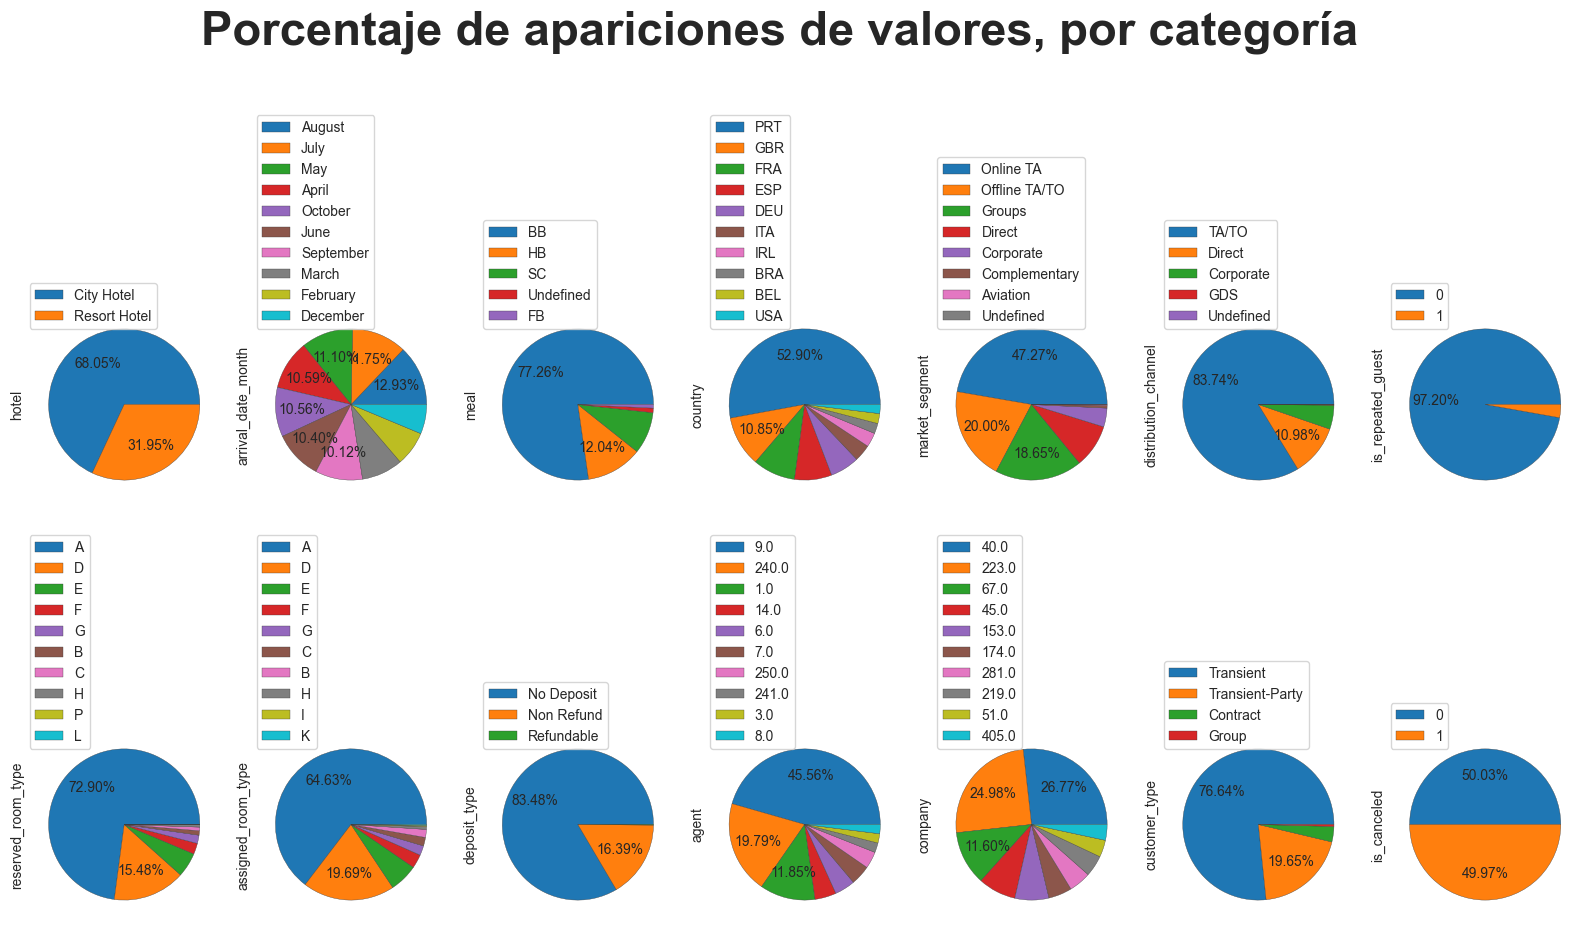

In [59]:
variables_categoricas = ["hotel", "arrival_date_month", "meal", "country", "market_segment", "distribution_channel",
                         "is_repeated_guest", "reserved_room_type", "assigned_room_type", "deposit_type", "agent",
                         "company", "customer_type", "is_canceled"]
limite_valores = 10
limite_porcentaje = 10.0

fig, axes = plt.subplots(nrows=2, ncols=7)
fig.set(figheight=10, figwidth=20) # en pulgadas
fig.suptitle("Porcentaje de apariciones de valores, por categoría", y=1.1, fontsize=34, weight="bold")

for i, categoria in enumerate(variables_categoricas):
    cuenta = df_trabajo[categoria].value_counts().to_frame()
    if len(cuenta) > limite_valores:
        cuenta = cuenta.head(limite_valores)

    ax = cuenta.plot.pie(subplots=True, ylabel=categoria,
                         autopct=(lambda pct: "%1.2f%%" % pct if pct >= limite_porcentaje else ""), # No mostrar porcentajes menores a 10%
                         pctdistance=0.65,
                         wedgeprops={"edgecolor": "#3c3c3c", "linewidth": 0.25},
                         legend=True, labeldistance=None,
                         ax=axes.flat[i])
    # 'ax' es, en realidad, un array de un sólo elemento: el 'Axes'. Esto es por subplots=True
    ax[0].legend(loc=(0, 0.9))


<hr width="20%" align="left" />

**Nota:** La variable `id` fue intencionalmente dejada de lado pues, si bien es técnicamente categórica, resulta trivial contar las apariciones de valores únicos (pues es esa justamente la tarea de la variable: ser única), e "inflaría" inútilmente los datos a mostrar. <br/>
Si acaso, podemos verificar rápidamente que no hay duplicados *en esa columna*.

In [60]:
ids = df_trabajo["id"].value_counts().to_frame().iloc[:, 0]
print(f"Cantidad de valores nulos: {ids.isna().sum()}\n"
      f"Cantidad de valores distintos a 1: {(ids != 1).sum()}")

Cantidad de valores nulos: 0
Cantidad de valores distintos a 1: 0


Y como se puede observar, la tabla está vacía porque no hay conteo de valor único donde no se anote exactamente `1`. Es decir, no hay IDs duplicados. <br/>
Tampoco hay valores nulos que podrían no haberse tomado en cuenta para el cálculo.

In [61]:
# creamos o modificamos algunas variables globales, para después
variables_categoricas += ["id"] # la agregamos ahora, para tenerlo correctamente
variables_cuantitativas = [categoria for categoria in df_trabajo.columns if categoria not in variables_categoricas]

<hr width="30%" align="left" />

## Correlaciones

Comprobamos a continuación la correlación entre las variables numéricas:

Text(0.5, 1.05, 'Correlaciones entre cada par de variables (sólo numéricas)')

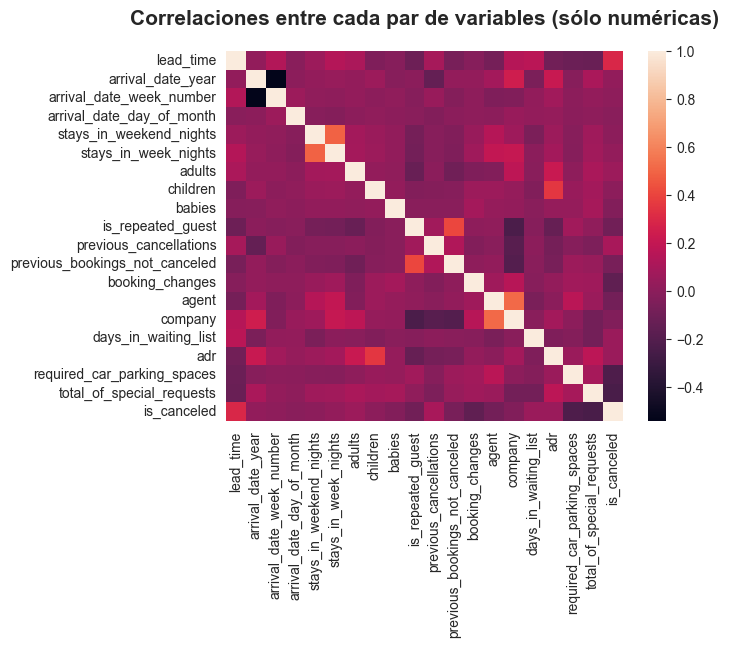

In [62]:
correlaciones = df_trabajo.corr(numeric_only=True)
sns.heatmap(correlaciones)
plt.title("Correlaciones entre cada par de variables (sólo numéricas)",
          y=1.05,
          fontdict={"size": 15, "weight": "bold"})

Se nota, por ejemplo, correlaciones sobresalientes entre los siguientes pares:
1. `arrival_date_year` y `arrival_date_week_number`
2. `stays_in_weekend_nights` y `stays_in_week_nights`
3. `previous_bookings_not_canceled` e `is_repeated_guest`
4. `agent` y `company`

Sus puntajes de Pearson son los siguientes:

In [63]:
puntajes_pearson = pd.DataFrame(data={
    "arrival_date_year / arrival_date_week_number": correlaciones['arrival_date_year']['arrival_date_week_number'],
    "stays_in_weekend_nights / stays_in_week_nights": correlaciones['stays_in_weekend_nights']['stays_in_week_nights'],
    "previous_bookings_not_canceled / is_repeated_guest": correlaciones["previous_bookings_not_canceled"]["is_repeated_guest"],
    "agent / company": correlaciones["agent"]["company"]},
                                index=["Pearson"])

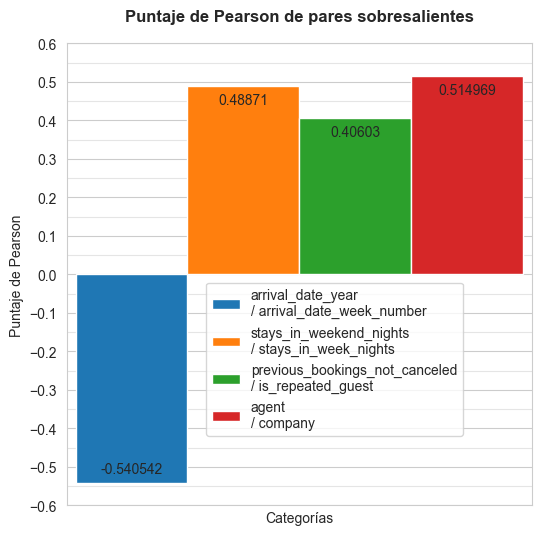

In [64]:
ax = puntajes_pearson.plot.bar(ylabel="Puntaje de Pearson",
                               xlabel="Categorías",
                               figsize=(6, 6),
                               rot=0.0,
                               xticks=[])

# Detalles
plt.title("Puntaje de Pearson de pares sobresalientes", y=1.03, fontdict={"weight": "bold"})
ax.set_xlim(-0.26, 0.26)
ax.legend(labels=[cat.replace(" ", "\n", 1) for cat in puntajes_pearson.columns],
          loc=(0.3, 0.15))
for cont in ax.containers:
    ax.bar_label(container=cont, padding=-15)

# grilla
min_y, max_y = -0.6, 0.61
ax.set_yticks(np.arange(min_y, max_y, 0.1))
ax.set_yticks(np.arange(min_y, max_y, 0.05), minor=True)
ax.grid(which="major", alpha=1.0)
ax.grid(which="minor", alpha=0.5)

<hr width="25%" align="left" />

In [65]:
def modelo_lineal(cat_x: pd.Series, cat_y: pd.Series,
                  *,
                  ignorar_nulos: bool=False,
                  constante: Union[int, float, None]=None) -> tuple[np.ndarray, np.ndarray]:
    """
    Recibe dos categorías del DataFrame y devuelve la estimación de la regresión lineal.

    `cat_x` y `cat_y`: Series de pandas (típicamente columnas de un DataFrame) con las que hacer
                       la regresión lineal.

    `ignorar_nulos`: Si `cat_x` y/o `cat_y` contienen valores nulos, decidir si llenar esas
                     ocurrencias con una constante o no.

    `constante`: Si `ignorar_nulos=True`, usar este valor para llenar los valores nulos. Si
                 `ignorar_nulos=False`, se ignora este parámetro.
    """

    if ignorar_nulos:

        if constante is None:
            raise ValueError(f"Parámetro 'constante' no puede ser `None`. Debe tomar "
                             "preferiblemente un valor constante o entero o de punto flotante.")

        _cat_x = cat_x.fillna(value=constante)
        _cat_y = cat_y.fillna(value=constante)

    else:
        _cat_x = cat_x
        _cat_y = cat_y

    x = _cat_x.to_numpy()
    y = _cat_y.to_numpy()
    lr = LinearRegression()

    x_ = x.reshape(-1, 1)
    y_ = y.reshape(-1, 1)
    lr.fit(x_, y_)

    B1_e = round(lr.coef_[0][0], 2)
    B0_e = round(lr.intercept_[0], 2)
    y_e = B1_e * x_ + B0_e

    return x_, y_e

### 1. `arrival_date_year` y `arrival_date_week_number`

Text(0.5, 1.05, 'Gráfico de dispersión:\narrival_date_week_number   vs   arrival_date_year')

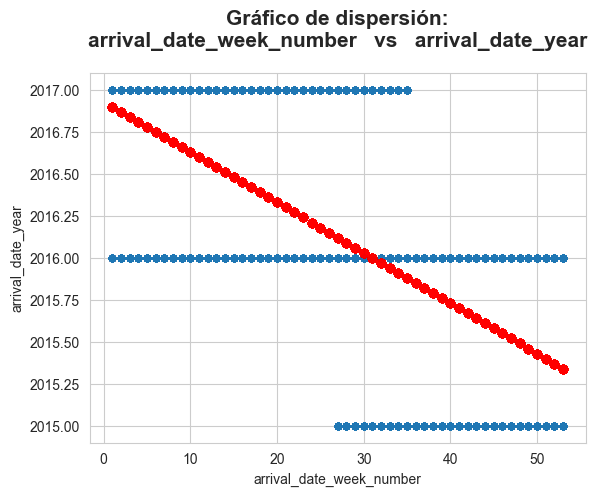

In [66]:
df_trabajo.plot.scatter(y="arrival_date_year", x="arrival_date_week_number", alpha=0.1)

x_, y_e = modelo_lineal(cat_x=df_trabajo["arrival_date_week_number"],
                        cat_y=df_trabajo["arrival_date_year"])
plt.scatter(x=x_, y=y_e, color="red", alpha=0.1)
plt.title("Gráfico de dispersión:\narrival_date_week_number   vs   arrival_date_year",
          y=1.05,
          fontdict={"fontsize": 15, "weight": "bold"})

Los valores que toma `arrival_date_year` son muy limitados, por lo que no sorprende que haya un agrupamiento más apreciable cuando se lo relaciona con otras categorías. <br/>
Acá en particular es notable que en 2015 la gente llegaba un número de semana tardío; en 2016 la tendencia fue equilibrada; sin embargo en 2017 se ve por su parte tira ligeramente a llegar en números de semana más tempranos.

### 2. `stays_in_weekend_nights` y `stays_in_week_nights`

Text(0.5, 1.05, 'Gráfico de dispersión:\nstays_in_week_nights   vs   stays_in_weekend_nights')

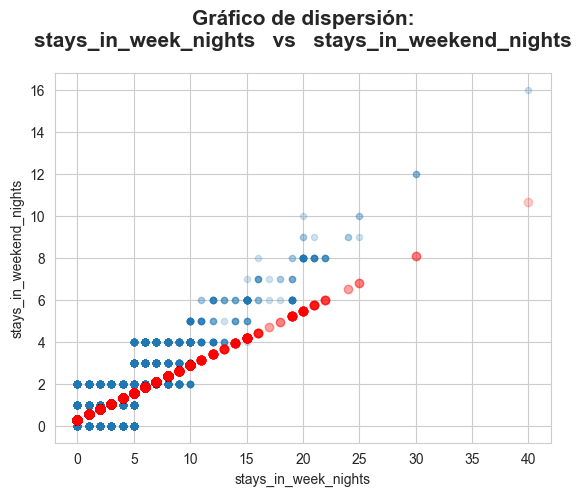

In [67]:
df_trabajo.plot.scatter(y="stays_in_weekend_nights", x="stays_in_week_nights", alpha=0.2)

x_, y_e = modelo_lineal(cat_x=df_trabajo["stays_in_week_nights"],
                        cat_y=df_trabajo["stays_in_weekend_nights"])
plt.scatter(x=x_, y=y_e, color="red", alpha=0.2)
plt.title("Gráfico de dispersión:\nstays_in_week_nights   vs   stays_in_weekend_nights",
          y=1.05,
          fontdict={"fontsize": 15, "weight": "bold"})

Acá ya es más evidente que la cantidad de noches de semana en las que un cliente se queda es proporcional a las noches de fin de semana que reserva también. <br/>
Suponiendo que la reserva es una estadía sin huecos en el medio, la proporción ideal serían $\frac{2}{5}$ días de finde por los días de semana _(hay 2 días de finde en una semana de los 7 totales, los restantes 5 son "de semana")_. No tiene por qué ser el caso (podrían hacer una reserva de miércoles al otro míercoles), pero en una semana redonda la proporción sería cercana a eso. <br/>
Queda, de hecho, evidenciado en el gráfico: los valores de `25`, `30` y `40` días de semana tienen pares de `10`, `12` y `16` respectivamente ($30 \cdot \frac{2}{5} = 12$, en efecto), y se sigue esa tendencia.

Adicionalmente, es apreciable que:

* Cuando `stays_in_weekend_nights` toma valor `0`, su par `stays_in_week_nights` jamás toma valores mayores a `5`.
* Cuando `stays_in_week_nights` toma valor `0`, su par `stays_in_weekend_nights` jamás toma valor mayor a `2`.

Lo cual refuerza la idea de que, de haber reservas con días de semana, éstos pertenecen a la misma semana.

<br/>

**Resulta alarmante** sin embargo notar que hay valores en donde ambas variables parecen tener `0` como valor. Esto consideraría que el cliente hizo una reserva con cero días de estadía, y no tiene sentido.

In [68]:
df_estadia_nula = df_trabajo[(df_trabajo["stays_in_week_nights"] == 0)
                            & (df_trabajo["stays_in_weekend_nights"] == 0)]
cantidad_estadias_nulas = df_estadia_nula.shape[0]
print(f"Hay {cantidad_estadias_nulas} registros en donde la estadía es de 0 días.")

Hay 297 registros en donde la estadía es de 0 días.


Los datos serán tratados [más tarde](#variables-stays_in_week_nights-y-stays_in_weekend_nights).

### 3. `previous_bookings_not_canceled` e `is_repeated_guest`

Text(0.5, 1.05, 'Gráfico de dispersión:\nprevious_bookings_not_canceled   vs   is_repeated_guest')

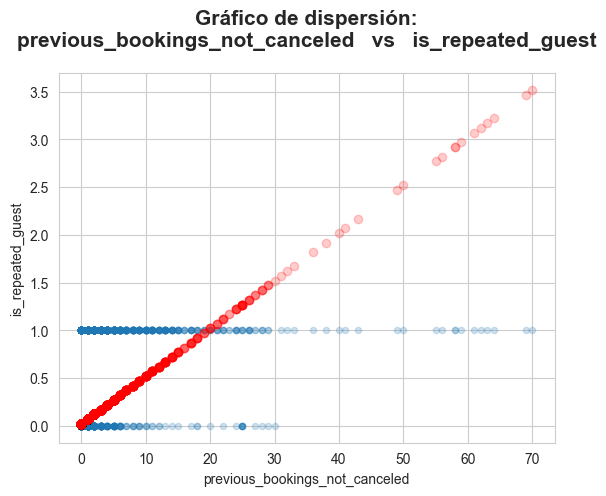

In [69]:
df_trabajo.plot.scatter(y="is_repeated_guest", x="previous_bookings_not_canceled", s=20, alpha=0.2)

x_, y_e = modelo_lineal(cat_x=df_trabajo["previous_bookings_not_canceled"],
                        cat_y=df_trabajo["is_repeated_guest"])
plt.scatter(x=x_, y=y_e, color="red", alpha=0.2)
plt.title("Gráfico de dispersión:\nprevious_bookings_not_canceled   vs   is_repeated_guest",
          y=1.05,
          fontdict={"fontsize": 15, "weight": "bold"})

A primera vista, parece haber más cantidad de clientes repetidos (en el sentido que no es la primera vez que reservan) pero como se ve en un [análisis anterior](#variables-categóricas), los clientes primerizos son una _aplastante_ mayoría (97%): simplemente están tan concentrados que no se aprecia bien. <br/>
De igual forma, al igual que los clientes repetidos, igual se concentran en valores menores de reservas no canceladas: la pendiente pronunciada es generada puramente por la densidad de valores en los primerizos.

**Es igualmente** fuera de lo común observar una cosa: de ser cliente primerizo (cuando `is_repeated_guest` es `0`), no tendría sentido tener reservas no canceladas distintas a 0. <br/>
Calculamos la cantidad de dichos registros:

In [70]:
df_con_reservas_previas = df_trabajo[(df_trabajo["is_repeated_guest"] == 0)
                                     & (df_trabajo["previous_bookings_not_canceled"] != 0)]
cantidad_reservas_sospechosas = df_con_reservas_previas.shape[0]
print(f"Hay {cantidad_reservas_sospechosas} registros donde un cliente primerizo tiene más de 0 reservas no canceladas")

Hay 323 registros donde un cliente primerizo tiene más de 0 reservas no canceladas


Los datos, de nuevo, serán tratados [más tarde](#variables-is_repeated_guest-y-previous_bookings_not_canceled).

### 4. `agent` y `company`

Text(0.5, 1.05, 'Gráfico de dispersión:\ncompany   vs   agent')

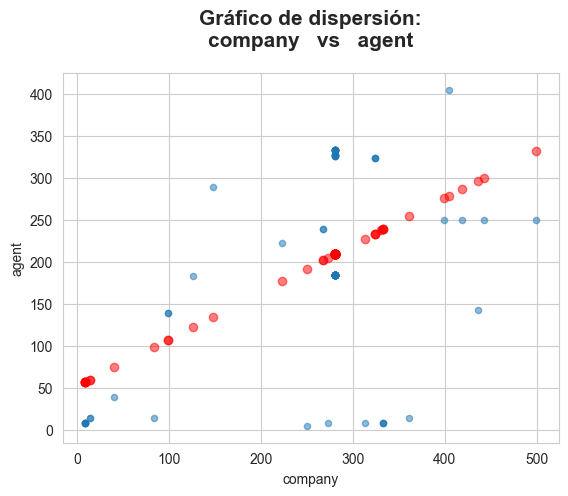

In [71]:
# eliminar filas si cualquiera de ambas categorías tiene valores nulos
df_agent_company = df_trabajo[["agent", "company"]].dropna()
df_agent_company.plot.scatter(y="agent", x="company", alpha=0.5)

x_, y_e = modelo_lineal(cat_x=df_agent_company["company"],
                        cat_y=df_agent_company["agent"])
plt.scatter(x=x_, y=y_e, color="red", alpha=0.5)
plt.title("Gráfico de dispersión:\ncompany   vs   agent",
          y=1.05,
          fontdict={"fontsize": 15, "weight": "bold"})

Tanto `agent` y `company` parecen tomar valores numéricos como IDs de la agencia/companía asociada a una reserva. <br/>
No tenemos muchos detalles al respecto, pero si asumimos que siguen ambas varaibles la misma convención interna, podríamos concluir que si `agent` y `company` tienen un mismo valor `x`, podrían referirse a la misma entidad. <br/>

No es muy descabellado tampoco: sabemos por sus descripciones que `agent` es la encargada de efectivamente hacer reservas al hotel, y `company` potencialmente tendría el mismo propósito, salvo por los casos en los que otra entidad tuviese la responsabilidad de pago.

<br/>

Ahora, si seguimos esa lógica, una línea de pendiente 1 significaría que la agencia que hace la reserva tiende a ser la misma que maneja las transacciones para pagarla. Pero por mucho que parezca sugerir la regresión lineal, nigún punto parece pararse _exactamente_ sobre esa línea. <br/>
Es decir, o siempre se tiene a otra entidad para pagar, o simplemente los datos siguen una convención distinta para ambas variables.

<hr width="20%" align="left" />

**Nota:** _Las categorías en cuestión son todas variables cuantitativas discretas, o bien categóricas (pero enmascaradas con números)._ Esto no parece darle mucho sentido a la línea hecha con regresión lineal, donde parece querer predecir valores en forma continua ("entre" los valores del conjunto discreto). <br/>
Aún así, lo dejamos a modo ilustrativo para dejar evidente datos como la pendiente, que indica más claramente qué tan estrechamente están correlacionadas las variables analizadas.

<hr width="30%" align="left" />

## Relaciones con el `target`

Vimos en el [heatmap](#correlaciones) que el **target** (`is_canceled`) se correlaciona con las demás variables de la siguiente manera:

In [72]:
corr_target = correlaciones[["is_canceled"]].sort_values(by="is_canceled")
corr_target

,is_canceled
total_of_special_requests,-0.244997
required_car_parking_spaces,-0.225915
booking_changes,-0.159315
is_repeated_guest,-0.090492
agent,-0.086176
previous_bookings_not_canceled,-0.065868
company,-0.040010
babies,-0.032034
arrival_date_day_of_month,-0.007371
stays_in_weekend_nights,0.001279


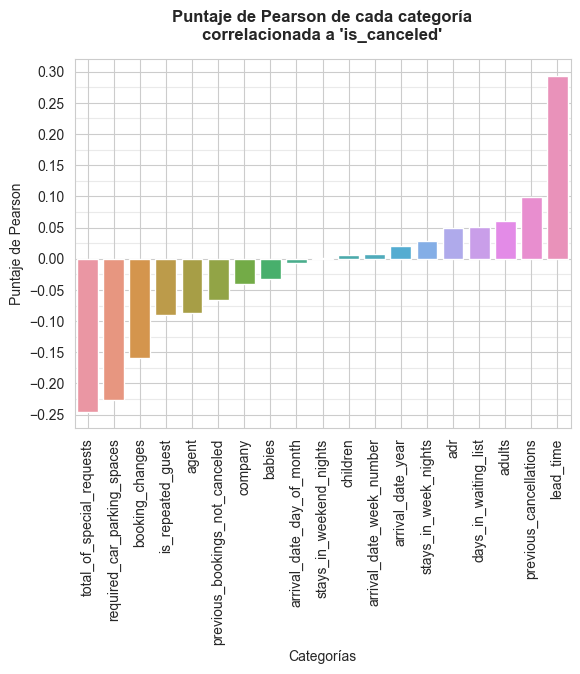

In [73]:
corr_target_cols = corr_target.drop("is_canceled").transpose()
ax = sns.barplot(data=corr_target_cols)
ax.set(ylabel="Puntaje de Pearson", xlabel="Categorías")

# # Detalles
plt.title("Puntaje de Pearson de cada categoría\ncorrelacionada a 'is_canceled'",
          y=1.03, fontdict={"weight": "bold"})
ax.set_xticklabels(ax.get_xticklabels(), rotation=90.0)

# grilla
min_y, max_y = -0.25, 0.31
ax.set_yticks(np.arange(min_y, max_y, 0.05))
ax.set_yticks(np.arange(min_y, max_y, 0.025), minor=True)
ax.grid(which="major", alpha=1.0)
ax.grid(which="minor", alpha=0.4)

Donde, como mucho, `is_canceled` presenta sus correlaciones más estrechas con `total_of_special_requests`, `required_car_parking_spaces`, `booking_changes` y `lead_time`. <br/>
Aun así, no parecen estar tan estrechamente relacionadas como para sacar mucho provecho, pero resulta curioso notar que todas refieren al cliente requiriendo de necesidades quizá un poco extraordinarias (cantidad de cambios en la reserva, cantidad de pedidos especiales, etc.)

<hr/>

# **Datos faltantes:**

Primero, una rápida comprovación de que no hay filas repetidas:

In [74]:
duplicados = df_trabajo.duplicated(keep=False).sum()
print(f"Número de filas duplicadas: {duplicados}")

Número de filas duplicadas: 0


Ahora sí, analizamos los valores nulos:

In [75]:
df_columnas_con_nulos = df_trabajo.copy()
variables = df_columnas_con_nulos.columns
total = len(df_columnas_con_nulos.index)

for var in variables:
    cant_nulos = df_columnas_con_nulos[var].isna().sum()
    if cant_nulos == 0:
        df_columnas_con_nulos.drop(var, axis=1, inplace=True)
df_columnas_con_nulos.head(10)

,children,country,agent,company
0,0.0,USA,9.0,NaN
1,0.0,PRT,NaN,NaN
2,2.0,CHE,9.0,NaN
3,0.0,PRT,154.0,NaN
4,0.0,FRA,20.0,NaN
5,0.0,AGO,NaN,NaN
6,0.0,FRA,314.0,NaN
7,0.0,PRT,9.0,NaN
8,0.0,GBR,9.0,NaN
9,0.0,PRT,240.0,NaN


`children`, `country`, `agent` y `company` son las únicas categorías que tienen al menos un valor nulo en su columna.

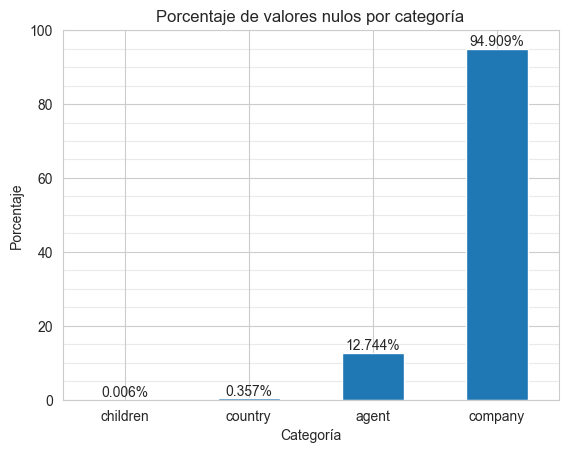

In [76]:
serie_col_con_nulos = df_columnas_con_nulos.isna().sum() / len(df_columnas_con_nulos.index) * 100

ax = serie_col_con_nulos.plot.bar(title="Porcentaje de valores nulos por categoría",
                                  xlabel="Categoría", ylabel="Porcentaje", rot=0.0,
                                  yticks=np.arange(0, 101, 20))
ax.set_yticks(np.arange(0, 101, 5), minor=True)
ax.grid(which="major", alpha=1.0)
ax.grid(which="minor", alpha=0.4)
for cont in ax.containers:
    ax.bar_label(container=cont, fmt="%1.3f%%")

`company` tiene una cantidad considerable de datos faltantes, lo suficiente como para tampoco poder inferir qué valores podrían tomar mediante imputaciones, por lo que resolvemos eliminar esa columna del DataFrame. <br/><br/>
`children` y `country` parecen contener valores faltantes tan poco frecuentes como para decir que el aporte de las filas afectadas es despreciable: eliminamos esas filas específicas.

In [77]:
df_sanitizada = df_trabajo.drop(columns=["company"]).dropna(axis="index", subset=["children", "country"])

In [78]:
prueba = df_sanitizada[(df_sanitizada["stays_in_week_nights"] == 0) & (df_sanitizada["stays_in_weekend_nights"] == 0)][
    ["stays_in_week_nights", "stays_in_weekend_nights", "adr"]
]
prueba.value_counts()

stays_in_week_nights  stays_in_weekend_nights  adr
0                     0                        0.0    293
Name: count, dtype: int64

Con respecto a `agent`, notamos que todos los valores que no son nulos terminan en '.0'. Es decir, el ID como tal quizá pretende ser un número entero. <br/>
Debido a limitaciones de pandas ( o de numpy, en realidad), se nos complica transformar los _floats_ a enteros mientras haya valores nulos aún en la columna. Así que primero imputaremos los valores nulos con la aparición más frecuente:

In [79]:
df_copia = df_sanitizada.copy()
imputador = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
datos_imputados = imputador.fit_transform(df_copia)

df_imp = pd.DataFrame(data=datos_imputados,
                      index=df_copia.index,
                      columns=df_copia.columns)
df_sanitizada["agent"] = df_imp["agent"].astype(int)
df_sanitizada.reset_index(drop=True) # para hacer coincidir de nuevo los números del índice
df_sanitizada[["agent"]].head()

,agent
0,9
1,9
2,9
3,154
4,20


In [80]:
def ajustar_limites(ax: "Axes",
                    serie: Optional[pd.Series]=None,
                    *,
                    pad: float=50.0):
    """
    Ajusta los límites de un gráfico a mano.

    Esto lo usamos principalmente para no dejar al gráfico de densidad
    con los pisos "flotando" ni hacer que se extienda innecesariamente,
    pues hace más chica la figura observable.
    """

    x_minimo = (serie.min() if serie is not None else 0)
    x_maximo = (serie.max() if serie is not None else 500)

    ax.set_ylim(0)
    ax.set_xlim(x_minimo - pad, x_maximo + pad)

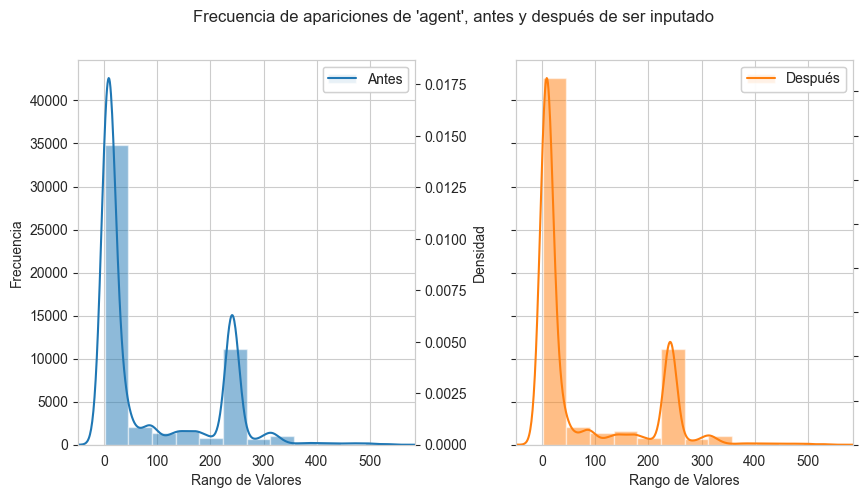

In [81]:
cant_barras = 12

antes = df_trabajo["agent"].copy().rename("Antes")
despues = df_sanitizada["agent"].copy().rename("Después")
df_comp = pd.DataFrame(data=[antes, despues]).transpose()

axes = df_comp.plot.hist(bins=cant_barras,
                         subplots=True, layout=(1, 2),
                         sharey=True, figsize=(10, 5),
                         title="Frecuencia de apariciones de 'agent', antes y después de ser inputado",
                         alpha=0.5)
hists = axes[0]
for i in (0, 1):
    hists[i].xaxis.set_label_text("Rango de Valores")
hists[0].yaxis.set_label_text("Frecuencia") # Esta línea tiene que ir acá o sino pyplot se enoja >:)

kdes = df_comp.plot.kde(subplots=True, sharey=True, secondary_y=True, ax=hists)
kdes[0].yaxis.set_label_text("Densidad")

# ajustes
ajustar_limites(kdes[0], df_trabajo["agent"])
ajustar_limites(kdes[1], df_sanitizada["agent"])
plt.subplots_adjust(wspace=0.3)

Y el DataFrame tiene por fin todos los datos reparados, sin ningún valor nulo.

In [82]:
df_sanitizada.isna().sum()

hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

<hr width="30%" align="left" />

# Datos Atípicos

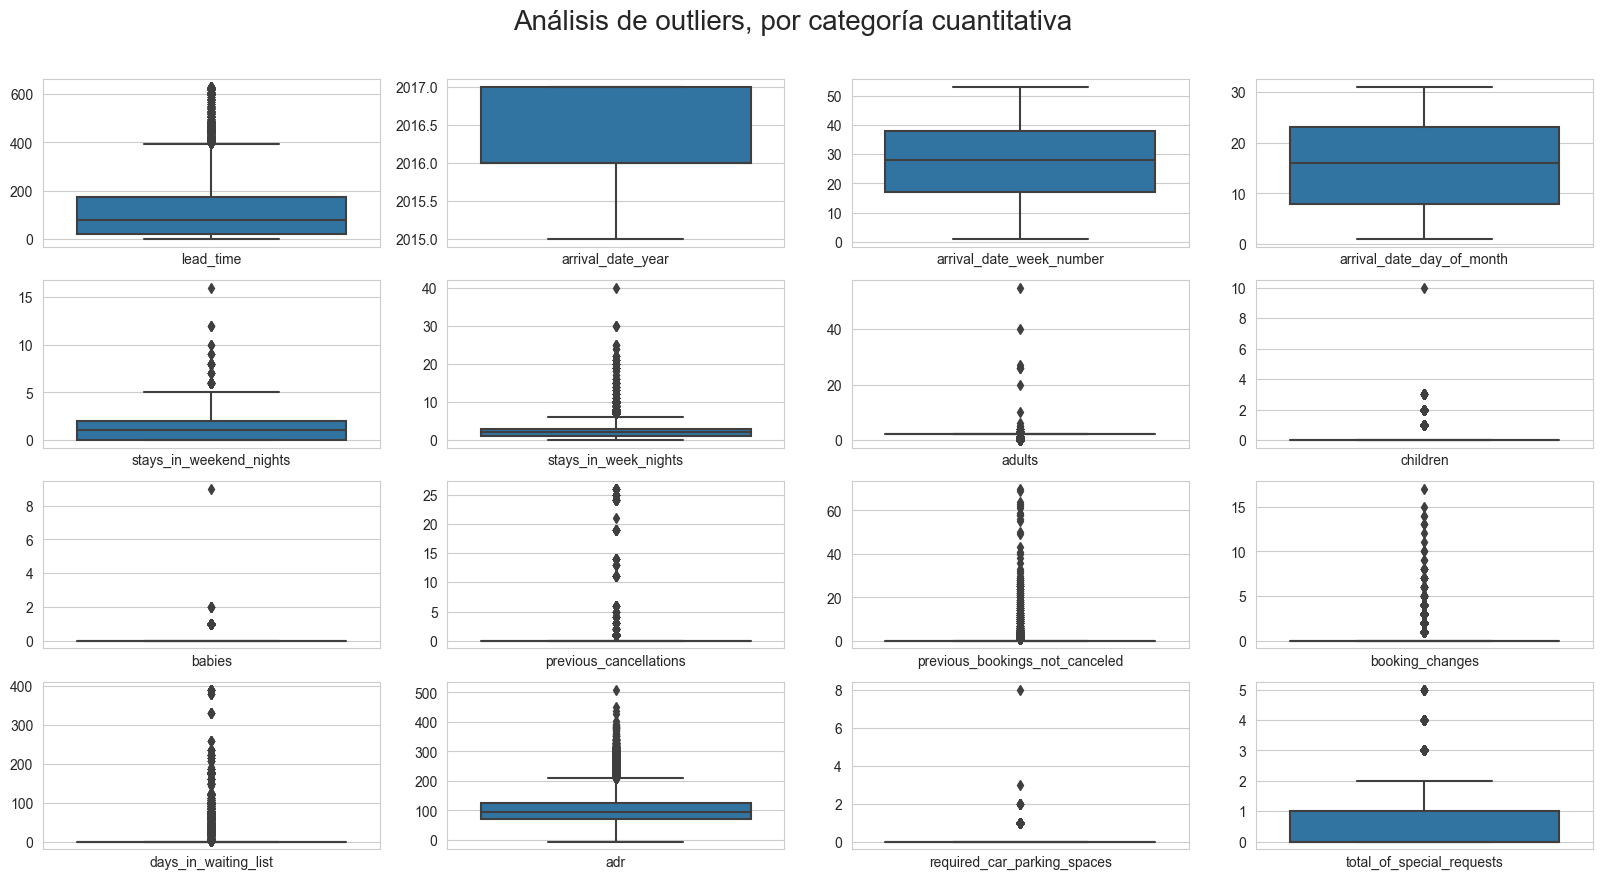

In [83]:
fig, axes = plt.subplots(nrows=4, ncols=4)
fig.set(figheight=10, figwidth=20) # en pulgadas
fig.suptitle("Análisis de outliers, por categoría cuantitativa", y=0.95, fontsize=20)

for i, cat in enumerate(variables_cuantitativas):
    ax = sns.boxplot(data=df_sanitizada[cat], ax=axes.flat[i])
    ax.set(xlabel=cat, xticks=[])

plt.subplots_adjust(wspace=0.2, hspace=0.2)

Donde casi todas las variables presetan _outliers_ debido a lo concentrados que se encuentran sus valores. <br/>
Aparte de las anomalías detectadas en análisis anteriores, las que acá vemos relevante de analizar univariadamente son las siguientes:

* `lead_time`
* `adr`
* `total_of_special_requests`

## Variable `lead_time`

Text(0.5, 1.0, "Análisis univariado de outliers de 'lead_time'")

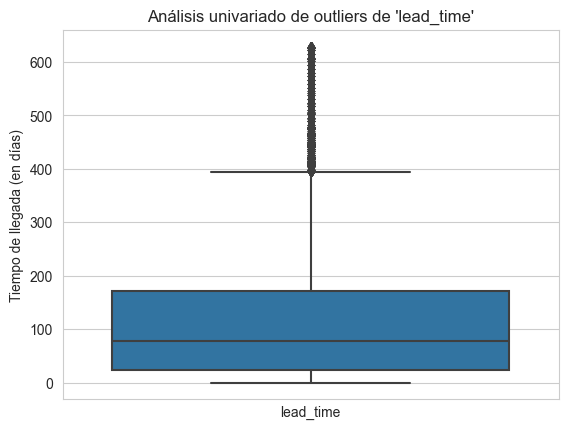

In [84]:
ax = sns.boxplot(data=df_sanitizada["lead_time"])
ax.set(xlabel="lead_time", ylabel="Tiempo de llegada (en días)", xticks=[])
plt.title("Análisis univariado de outliers de 'lead_time'")

La cantidad de outliers superiores es: 1079
La cantidad de outliers inferiores es: 0
La cantidad de outliers totales detectados es: 1079


<Axes: title={'center': "Histograma Z-Score Modificado 'lead_time'"}, xlabel='Z-Score Modificado lead_time', ylabel='Frequency'>

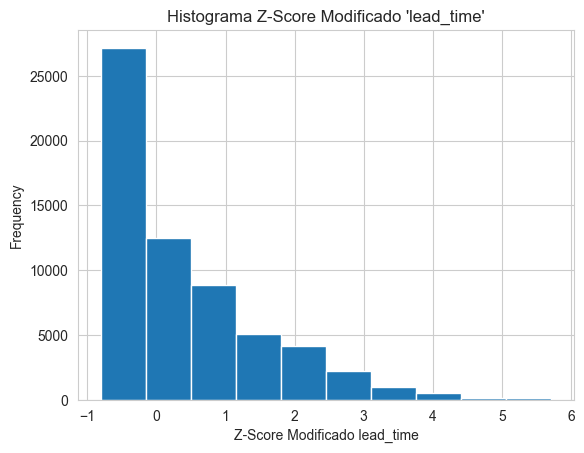

In [85]:
# Calculo Z-Score Modificado para la variable adr
mediana_lead_time = np.median(df_sanitizada["lead_time"])
MAD = np.median(np.absolute(df_sanitizada["lead_time"] - mediana_lead_time))
regla_oro = 3.5

# Lo agrego como una columna mas
df_zm_lead_time = df_sanitizada.copy()
df_zm_lead_time["zm_lead_time"] = (df_zm_lead_time["lead_time"] - mediana_lead_time) * 0.6745 / MAD

# Detecto los outliers
cantidad_outlier_superiores_zm = df_zm_lead_time[df_zm_lead_time["zm_lead_time"] > regla_oro].shape[0]
cantidad_outlier_inferiores_zm = df_zm_lead_time[df_zm_lead_time["zm_lead_time"] < -regla_oro].shape[0]
cantidad_outliers_total_zm = cantidad_outlier_inferiores_zm + cantidad_outlier_superiores_zm

print(f"La cantidad de outliers superiores es: {cantidad_outlier_superiores_zm}\n"
      f"La cantidad de outliers inferiores es: {cantidad_outlier_inferiores_zm}\n"
      f"La cantidad de outliers totales detectados es: {cantidad_outliers_total_zm}")

# Muestro los datos en un histograma
df_zm_lead_time["zm_lead_time"].plot.hist(title="Histograma Z-Score Modificado 'lead_time'",
                           xlabel="Z-Score Modificado lead_time")

In [86]:
df_zm_lead_time[df_zm_lead_time["zm_lead_time"] > regla_oro]["zm_lead_time"].describe()

count    1079.000000
mean        4.205597
std         0.635689
min         3.528154
25%         3.725315
50%         3.984738
75%         4.555469
max         5.717685
Name: zm_lead_time, dtype: float64

<Axes: title={'center': "Outliers detectados en 'lead_time'"}, xlabel='Z-Score Modificado lead_time', ylabel='Frequency'>

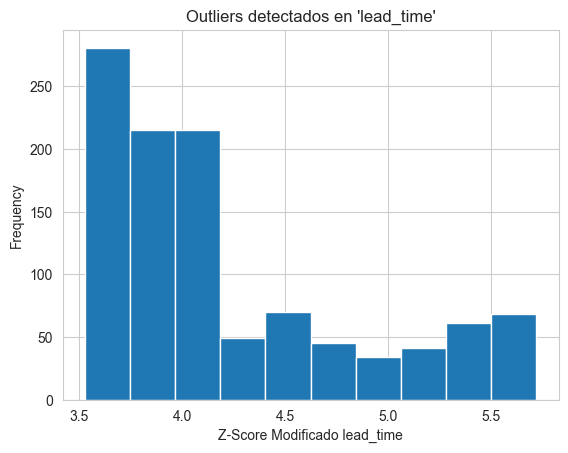

In [87]:
df_zm_lead_time[df_zm_lead_time["zm_lead_time"] > regla_oro]["zm_lead_time"].plot.hist(title="Outliers detectados en 'lead_time'",
                           xlabel="Z-Score Modificado lead_time")

Con todos estos datos, consideramos que si bien es varios _outliers_, la verdad es que es [verosímil tener reservas](https://awardwallet.com/blog/far-advance-can-book-hotel-reservations/) con tantos días de anticipación.
La tendencia suele ser de como mucho 1 año, pero en los datos que tenemos la cantidad de apariciones por valor parece mantenerse de manera uniforme como para no considerarlos atípicos.
Resolvemos dejar esa columna como está.

## Variable `adr`

Podemos detectar en principio que hay muchos outliers superiores en la variable `adr`. Vamos a utilizar el método univariado `Z-Score Modificado` para detectarlos. Utilizamos la regla de oro para este método: valores mayores a `3.5` son considerados outliers

Text(0.5, 1.0, "Análisis univariado de outliers de 'adr'")

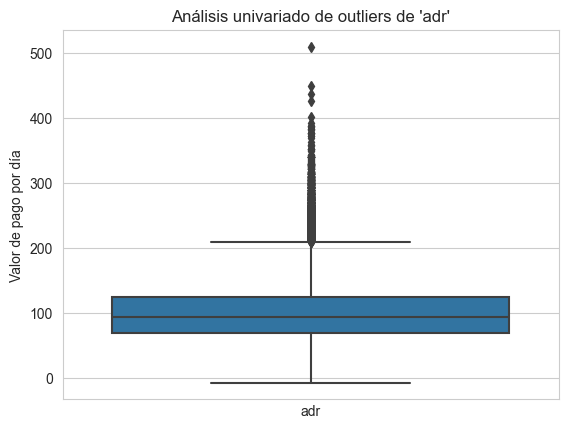

In [88]:
ax = sns.boxplot(data=df_sanitizada["adr"])
ax.set(xlabel="adr", ylabel="Valor de pago por día", xticks=[])
plt.title("Análisis univariado de outliers de 'adr'")

La cantidad de outliers superiores es: 967
La cantidad de outliers inferiores es: 0
La cantidad de outliers totales detectados es: 967


<Axes: title={'center': "Histograma Z-Score Modificado 'adr'"}, xlabel='Z-Score Modificado adr', ylabel='Frequency'>

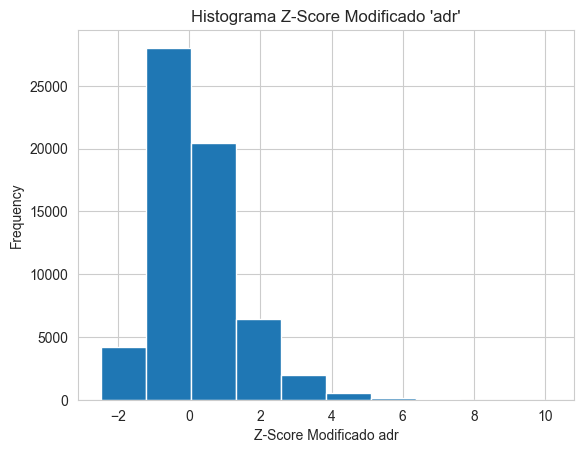

In [89]:
# Calculo Z-Score Modificado para la variable adr
mediana_adr = np.median(df_sanitizada["adr"])
MAD = np.median(np.absolute(df_sanitizada["adr"] - mediana_adr))
regla_oro = 3.5

# Lo agrego como una columna mas
df_zm_adr = df_sanitizada.copy()
df_zm_adr["zm_adr"] = (df_zm_adr["adr"] - mediana_adr) * 0.6745 / MAD

# Detecto los outliers
cantidad_outlier_superiores_zm = df_zm_adr[df_zm_adr["zm_adr"] > regla_oro].shape[0]
cantidad_outlier_inferiores_zm = df_zm_adr[df_zm_adr["zm_adr"] < -regla_oro].shape[0]
cantidad_outliers_total_zm = cantidad_outlier_inferiores_zm + cantidad_outlier_superiores_zm

print(f"La cantidad de outliers superiores es: {cantidad_outlier_superiores_zm}\n"
      f"La cantidad de outliers inferiores es: {cantidad_outlier_inferiores_zm}\n"
      f"La cantidad de outliers totales detectados es: {cantidad_outliers_total_zm}")

# Muestro los datos en un histograma
df_zm_adr["zm_adr"].plot.hist(title="Histograma Z-Score Modificado 'adr'",
                           xlabel="Z-Score Modificado adr")

In [90]:
df_zm_adr[df_zm_adr["zm_adr"] > regla_oro]["adr"].describe()

count    967.000000
mean     270.788893
std       32.108394
min      237.750000
25%      248.100000
50%      260.000000
75%      285.000000
max      510.000000
Name: adr, dtype: float64

<Axes: title={'center': " Outliers detectados en 'adr'"}, xlabel='Z-Score Modificado adr', ylabel='Frequency'>

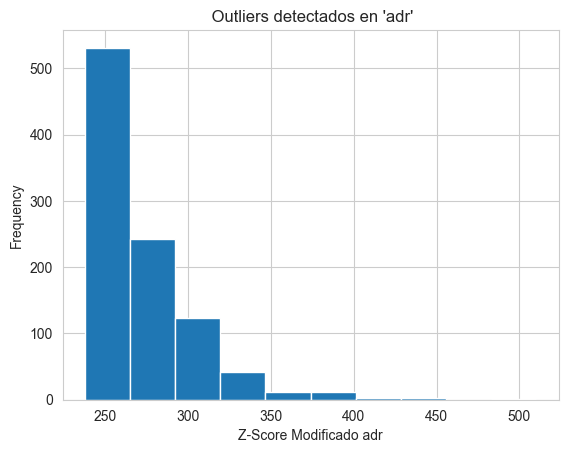

In [91]:
df_zm_adr[df_zm_adr["zm_adr"] > regla_oro]["adr"].plot.hist(title=" Outliers detectados en 'adr'",
                           xlabel="Z-Score Modificado adr")

Un análisis adicional curioso resulta de observar los valores, en donde hay cantidad algo tangible de registros donde su valor resulta `0` o incluso negativo:

In [92]:
df_sanitizada["adr"].value_counts().sort_index()

adr
-6.38        1
 0.00      875
 0.50        1
 1.00        9
 1.48        1
          ... 
 402.00      1
 426.25      1
 437.00      1
 450.00      1
 510.00      1
Name: count, Length: 6142, dtype: int64

Ahora, no sabemos cuáles son los precios de estadía del hotel en los datos (y por lo tanto se nos complica juzgar adecuadamente si pagaron de más o de menos); por lo que nos limitamos a tratar los datos que directamente carecen de sentido: los que tienen a `0` y el de valor negativo los borramos:

In [93]:
if df_sanitizada["adr"][df_sanitizada["adr"] <= 0].count() != 0: # borrar sólo una vez
    filas_a_borrar = df_sanitizada[df_sanitizada["adr"] <= 0].index
    df_sanitizada.drop(filas_a_borrar, inplace=True)

## Variable `total_of_special_requests`

Text(0.5, 1.0, "Análisis univariado de outliers de 'total_of_special_requests'")

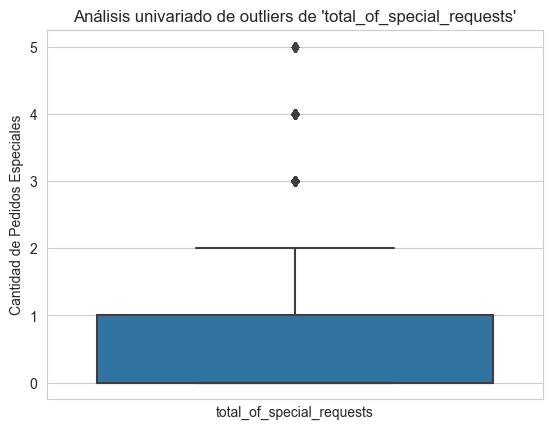

In [94]:
ax = sns.boxplot(data=df_sanitizada["total_of_special_requests"])
ax.set(xlabel="total_of_special_requests", ylabel="Cantidad de Pedidos Especiales", xticks=[])
plt.title("Análisis univariado de outliers de 'total_of_special_requests'")

Salta a primera vista que los valores se concentran en `0` y `1`. Los _outliers_ llegan como mucho hasta `5`: esto no es muy descabellado tampoco. <br/>
Resolvemos dejar esta variable como está.

<hr width="65.5319%" align="left" />

Ahora sí, conviene hacer unos últimos análisis que resaltaron a lo largo de puntos anteriores:

## Variable `adults`

En otra situación particular, notamos que del conteo de valores de `adults`:

In [95]:
df_sanitizada["adults"].value_counts().sort_index()

adults
0      131
1    11034
2    46470
3     3148
4       29
Name: count, dtype: int64

Hay entradas en las hay `0` adultos en la reserva; esto lo consideramos un error. También parece curioso reservas de 40 o 55 personas adultas a la vez. <br/>
Como cada "reserva" en los datos parece ser equivalente a una habitación _(el razonamiento, veremos, está más adelante)_, consideramos como válida una cantidad de personas (`adults` + `children` + `babies`) que el sentido común nos dice es viable que habiten cómodamente dicha habitación. <br/>
Podemos, de hecho, **crear una nueva columna** para ayudar con ese análisis.

In [96]:
var_gente = "people"

personas = (df_sanitizada["adults"] + df_sanitizada["children"] + df_sanitizada["babies"]).astype(int)

if var_gente not in df_sanitizada.columns: # agregar sólo una vez
    df_sanitizada.insert(11, var_gente, personas)

# aprovechamos para cambiar el dtype de 'children': no tiene sentido que sea un float
df_sanitizada["children"] = df_sanitizada["children"].astype(int)

df_sanitizada[["adults", "children", "babies", "people"]].head(10)

,adults,children,babies,people
0,1,0,0,1
1,2,0,0,2
2,2,2,0,4
3,2,0,0,2
4,2,0,0,2
5,1,0,0,1
6,2,0,0,2
7,2,0,0,2
8,2,0,0,2
9,2,0,0,2


_(_ `children` _era de tipo float y por lo tanto lo convertimos a entero: conceptualmente no tiene sentido tener "2 niños y medio". Fuera de eso, no había datos mal ingresados: similar a_ `agent` _y_ `company`_, terminaban todos en '.0', y el problema era de un casteo innecesario.)_

Así pues, tenemos una variable con la que imaginar el cálculo: podemos ver cuáles son los valores más comunes.

In [97]:
df_sanitizada["people"].value_counts().sort_index()

people
0        13
1     10822
2     42606
3      5201
4      2095
5        73
10        1
12        1
Name: count, dtype: int64

Efectivamente, `5` parece ser el número sensiblemente razonable más alto de personas que alojar en una habitación, y que tiene además cantidad apreciable de entradas. Es así pues, que consideramos tratar cualquier otro caso. <br/>

Cabe aclarar las siguientes consideraciones:

* **1. Cada reserva tiene en cuenta que le es asignada una y sólo una habitación.** Inferimos de los demás datos, como el tipo de habitación (no "tipos") en `reserved_room_type` y `assigned_room_type`, que cada reserva parece estar relacionada no más de una habitación. Si un cliente desea más habitaciones, quedarían internamente en el dataset como reservas separadas. <br/>

    - **1.1. Esto parece quedar evidenciado** con la variable `customer_type`, donde uno de sus posibles valores es `Transient-Party`: estarían ligadas a otras reservas del mismo tipo, lo que hace pensar que si el cliente es un grupo de varias personas, el sistema los guarda como reservas distintas.

<br/>

* **2. Cada habitación abarca como máximo 5 personas, no más.** Desconocemos los detalles de las habitaciones (pues se expresan con letras para mantener el anonimato), pero siguiendo la lógica del punto **1**, si vemos que en una reserva hay un número de personas mayor a 5, lo entenderemos como que pretenden habitar todos a la vez esa misma habitación. Eso no lo consideramos posible.

* **3. Las personas que van a parar a una habitación, de ser parte de un grupo familiar, comparten todos el mismo cuarto.** Esto parece similar a la consideración de **1.1**, pero imaginemos: no es impensable que una misma familia reserve 2 habitaciones, fuera la cantidad de padres más hijos excedente a 5. De ésto inferimos dos posibilidades:

    - **A)** Se reparten de manera que hay al menos un adulto por habitación (una con el padre y los hijos varones, y la otra con la madre y las hijas, por ejemplo).<br/>
    Ésto conforme al punto **1** serían dos reservas distintas para empezar.

    - **B)** Los padres en una habitación y los hijos en otra. Esto da la ilusión de que serviría como una explicación para las entradas de `0` adultos (pues internamente son reservas distintas), pero surgen problemas como que los demás datos parecerían atribuir a menores características extrañas (como la tasa diaria de pagos `adr`). Aún en el improbable caso en que hiciéramos coincidir datos con la reserva de los padres, sólo lograríamos infectar al dataset con datos confusos. <br/>
    Se sobrentiende que además no es de sentido común dejar a menores solos.

Siguiendo lo antepuesto, resulta inmediata la resolución de tratar las entradas con `0` adultos.

In [98]:
df_sanitizada["adults"].value_counts().sort_index() / len(df_sanitizada.index) * 100

adults
0     0.215418
1    18.144445
2    76.415839
3     5.176610
4     0.047688
Name: count, dtype: float64

Y la cantidad de entradas con `0` adultos es menor al 1%. Consideramos borrar directamente las filas afectadas.

In [99]:
valores_indeseados = [0]

for valor in valores_indeseados:
    if df_sanitizada["adults"][df_sanitizada["adults"] == valor].count() != 0: # Sólo borrar una vez, no hacer nada en subsecuentes ejecuciones
        filas_a_borrar = df_sanitizada[df_sanitizada["adults"] == valor].index
        df_sanitizada.drop(filas_a_borrar, inplace=True)

In [100]:
# Si 'people' tiene valor de 1, la única posibilidad es que sea un adulto
df_gente = df_sanitizada[df_sanitizada["people"] == 1]
df_gente[df_gente["adults"] != 1].count().sum() # debería dar 0

0

Y a partir de ahora, podemos asumir que todas las reservas tienen al menos 1 adulto. Nos guiaremos por la variable `people` entonces.

## Variable `people`

Ya que estamos, cualquier valor de `people` mayor a `5` también es borrado, pues sus frecuencias de apariciones son casi nulas.

In [101]:
max_personas = 5

demasiadas_personas = df_sanitizada[df_sanitizada["people"] > max_personas]
display(demasiadas_personas[["adults", "children", "babies", "people"]])

pc = demasiadas_personas["people"].value_counts().sum() / len(df_sanitizada.index) * 100
print(f"Los valores a borrar representan un {pc:.5f}% del total.")

,adults,children,babies,people
12659,1,0,9,10
49181,2,10,0,12


Los valores a borrar representan un 0.00330% del total.


In [102]:
if df_sanitizada["people"][df_sanitizada["people"] > max_personas].count() != 0: # borrar sólo una vez
    filas_a_borrar = df_sanitizada[df_sanitizada["people"] > max_personas].index
    df_sanitizada.drop(filas_a_borrar, inplace=True)

## Variables `stays_in_week_nights` y `stays_in_weekend_nights`

En su respectivo análisis de correlación, notamos que habían entradas con `0` en ambas variables: éstos son valores atípicos multivariados.

<Axes: xlabel='stays_in_week_nights', ylabel='stays_in_weekend_nights'>

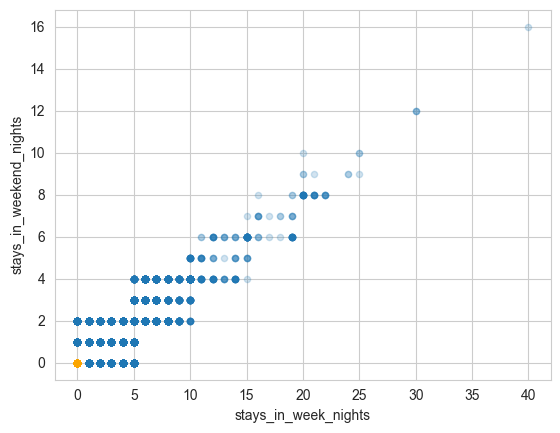

In [110]:
dias_validos = df_trabajo[(df_trabajo["stays_in_week_nights"] != 0) |
                          (df_trabajo["stays_in_weekend_nights"] != 0)]
dias_invalidos = df_trabajo[(df_trabajo["stays_in_week_nights"] == 0) &
                            (df_trabajo["stays_in_weekend_nights"] == 0)]
ax_valido = dias_validos.plot.scatter(y="stays_in_weekend_nights", x="stays_in_week_nights", alpha=0.2)
dias_invalidos.plot.scatter(y="stays_in_weekend_nights", x="stays_in_week_nights", alpha=0.2,
                            ax=ax_valido, color="orange")

Los datos en cuestión aparecen en naranja. Veamos si no representan un gran porcentaje:

In [104]:
cantidad_inv = dias_invalidos.shape[0]
porcentaje_inv = cantidad_inv / df_sanitizada.shape[0] * 100
print(f"Registros de estadía inválidos: {cantidad_inv} / {df_sanitizada.shape[0]}  ->  {porcentaje_inv:.5f}%")

Registros de estadía inválidos: 0 / 60679  ->  0.00000%


Y son menos de un 0.5% del total de registros, resolvemos eliminarlos.

_Resulta, sin embargo,_ que todos los registros en los que ambas variables tenían `0` son las mismas en las que `adr` valía `0.0` también. Es decir, ya fueron borradas [acá](#scrollTo=B3LxIptWkcP1).

## Variables `is_repeated_guest` y `previous_bookings_not_canceled`

Similarmente, este par también presenta valores atípicos multivariados:

<Axes: xlabel='previous_bookings_not_canceled', ylabel='is_repeated_guest'>

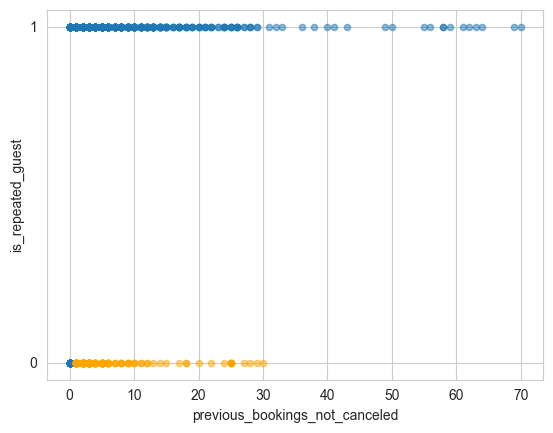

In [108]:
clientes_validos = df_trabajo[(df_trabajo["is_repeated_guest"] != 0) |
                              (df_trabajo["previous_bookings_not_canceled"] == 0)]
clientes_invalidos = df_trabajo[(df_trabajo["is_repeated_guest"] == 0) &
                                (df_trabajo["previous_bookings_not_canceled"] != 0)]
ax_validos = clientes_validos.plot.scatter(y="is_repeated_guest", x="previous_bookings_not_canceled", alpha=0.5)
ax_validos.set_yticks(np.arange(0, 1.1, 1))
clientes_invalidos.plot.scatter(y="is_repeated_guest", x="previous_bookings_not_canceled", alpha=0.5,
                                ax=ax_validos, color="orange")

In [106]:
cantidad_clientes_invalidos = df_sanitizada[(df_sanitizada["is_repeated_guest"] == 0) &
                                            (df_sanitizada["previous_bookings_not_canceled"] != 0)].shape[0]

if cantidad_clientes_invalidos != 0:
    filas_a_borrar = df_sanitizada[(df_sanitizada["is_repeated_guest"] == 0) &
                                   (df_sanitizada["previous_bookings_not_canceled"] != 0)].index
    df_sanitizada.drop(filas_a_borrar, inplace=True)

<hr/>

# Conclusión

Con esto, damos por hecho una tarea de preprocesamiento suficiente para comenzar con modelos de predicción. <br/>

El breve resumen se puede encontrar en el informe que se encuentra adjunto a este archivo.